# Christian Rosado, Homework 9
## Nov. 16, 2016

# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP (he will teach the Geopanda lecture).
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


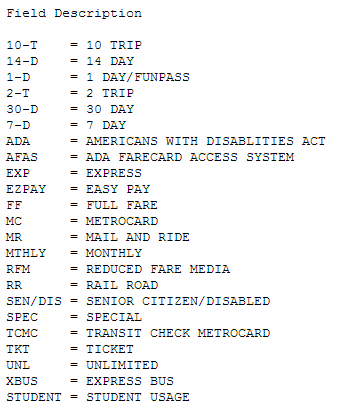

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

# Task 1 - Event Detection

In [289]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn 
import pylab
import statsmodels.formula.api as smf
% matplotlib inline

In [11]:
#mta_data = pd.DataFrame(np.load('MTA_Fare.npy'))
mta_data_without_floats = np.load('MTA_Fare.npy')

In [13]:
mta_data = mta_data_without_floats.astype(float)

In [22]:
shape = mta_data.shape
for x in range(0, shape[0]):
    for y in range(0, shape[1]):
        for z in range(0, shape[2]):
            if mta_data[x, y, z] == -1:
                mta_data[x, y, z] = np.nan

In [40]:
#df = pd.DataFrame(mta_data[0,:,:])
#df.head(24)
np.nanmean(mta_data[0,0,:])


58586.885416666664

In [37]:
means = np.nanmean(mta_data, axis=2)
sigmas = np.nanstd(mta_data, axis=2)



/Users/christianrosado/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


array([[  1.77610920e+04,   5.10965674e+02,   6.65317115e+01, ...,
          0.00000000e+00,   0.00000000e+00,   1.35590102e+03],
       [  3.13127879e+03,   9.65579122e+01,   1.01863172e+01, ...,
          9.44872836e-02,   0.00000000e+00,   3.32296750e+02],
       [  3.91400424e+02,   4.36007549e+01,   8.13711673e+00, ...,
          0.00000000e+00,   0.00000000e+00,   4.28312475e+02],
       ..., 
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan],
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan],
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan]])

In [43]:
mta_data.shape

(600, 23, 194)

In [400]:
dates = pd.date_range(start = '06/04/2010', end = '02/14/2014', freq = '7D')
len(dates)

194

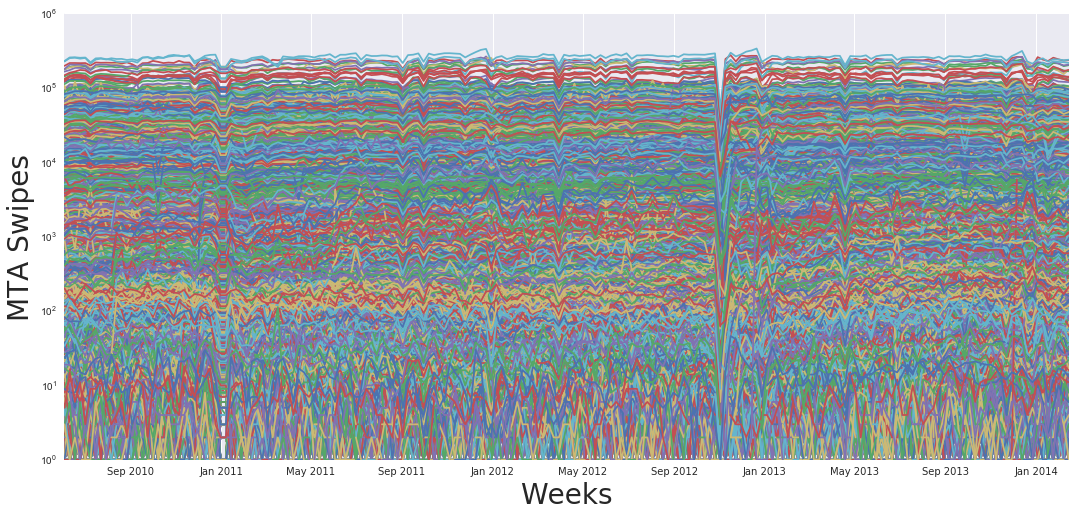

In [366]:
blue2red = ['#D91F1F', '#952540', '#502C61', '#0C3383', '#25957a'] 
plt.figure(figsize=(18,8))
for x in range(0, shape[0]):
    for y in range(0, shape[1]):
        plt.semilogy(dates, mta_data[x,y,:])
plt.xlabel('Weeks', fontsize = 28)
plt.ylabel('MTA Swipes', fontsize = 28)

In [405]:
mean = mta_data[100,2,:].mean()
sigma = mta_data[100,2,:].std()
threshhold = [mean - (sigma * 3)] * 194
x_values = range(194)

In [406]:
print len(threshhold)
print len(x_values)

194
194


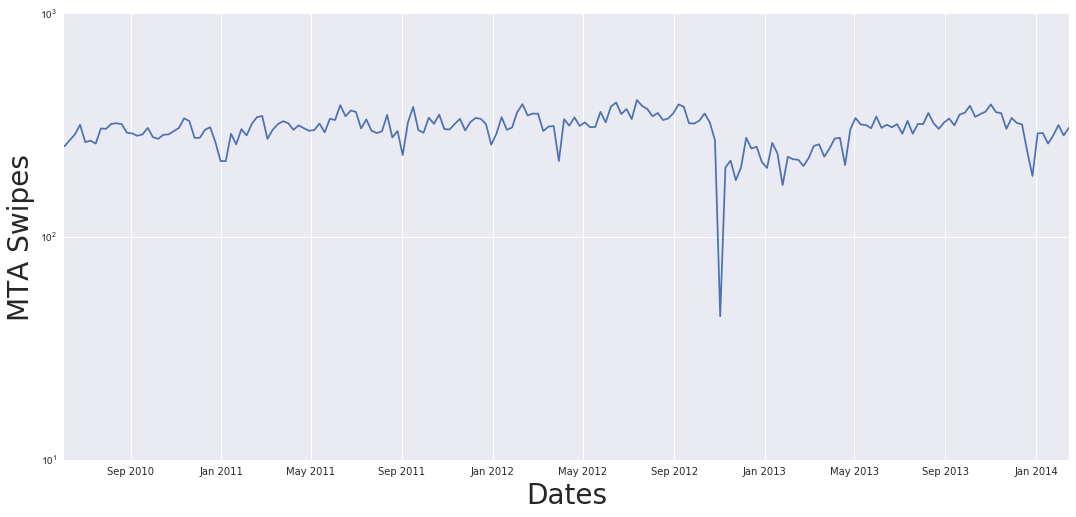

In [429]:
plt.figure(figsize=(18,8))
plt.semilogy(dates, mta_data[100,2,:])
#plt.plot(x_values, threshhold, '-r')
plt.xlabel('Dates', fontsize = 28)
plt.ylabel('MTA Swipes', fontsize = 28)

## The significant event Detected - Hurricane Sandy
### As a result, we observe a significant drop in MTA Swipes for all Card Types on October 29th, 2012
* Total fatalities: 285
* Highest wind speed: 115 mph
* Category: Category 3 Hurricane (SSHS)
* Date: October 22, 2012 – November 2, 2012

<img src='https://sites.google.com/a/cornell.edu/impact-of-hurricane-sandy-on-new-york-city-public-transit/_/rsrc/1367534323728/home/Hurricane-Sandy-Photo.jpg?height=282&width=400' legnth='300' width='300' style='float: right; margin-left: 15px; margine-top: 10px' />
<img src='https://robert.accettura.com/wp-content/uploads/2012/10/nasa_goes_hurricane_sandy.jpg' legnth='300' width='300' style='float: right; margin-left: 15px;' />
<img src='http://www.weather.gov/images/okx/Sandy/ManhattanLexingtonAve_WzohaibFlickrNHCReport.jpg' legnth='300' width='300' style='float: right; margin-left: 15px;' />

# Task 2 - Identifying ridership types that have steadily increased/decreased in popularity

In [ ]:
new_data = np.nansum(mta_data, axis=0)


In [335]:
ridetype = np.array(['_10t', '_14d', '_1d', '_2t', '_30d', '_7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [336]:
df = pd.DataFrame(new_data, index=ridetype).T

In [337]:
print np.arange(194)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193]


In [338]:
df['week'] = np.arange(194)
#df['y'] = df['_7d']
df.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

/Users/christianrosado/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()


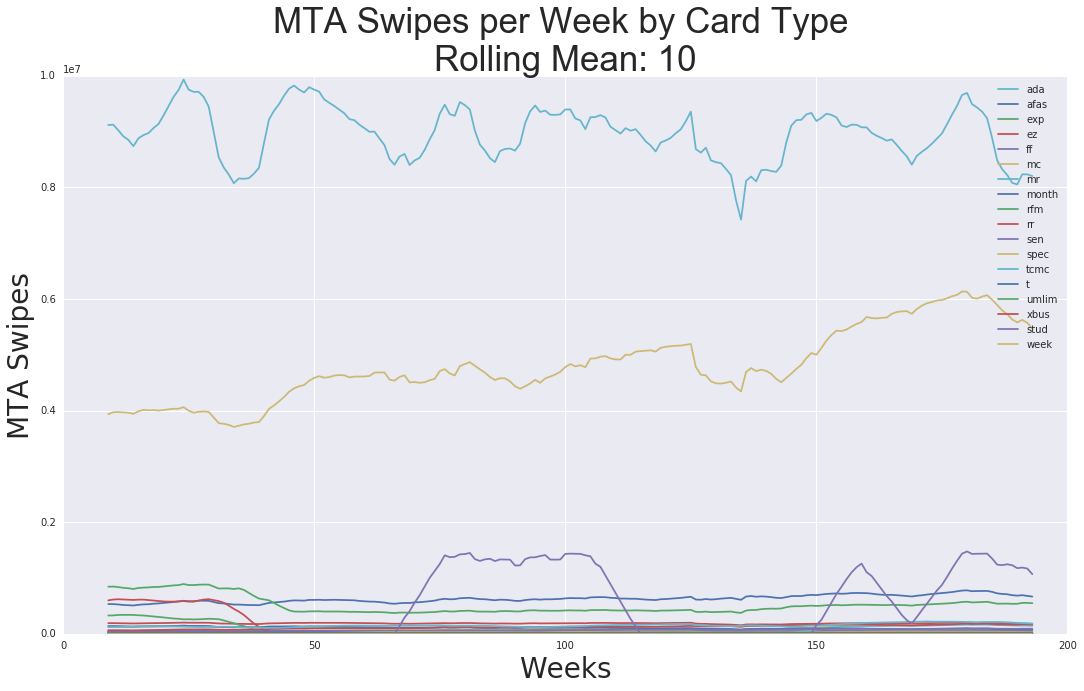

In [425]:
plt.figure(figsize=(18,10))
for x in df.columns[1:]:
    plt.plot(pd.rolling_mean(df[x], 10),label=x) 
    plt.legend()
plt.xlabel('Weeks', fontsize = 28)
plt.ylabel('MTA Swipes', fontsize = 28)
plt.title('MTA Swipes per Week by Card Type \nRolling Mean: 10', fontsize=35)

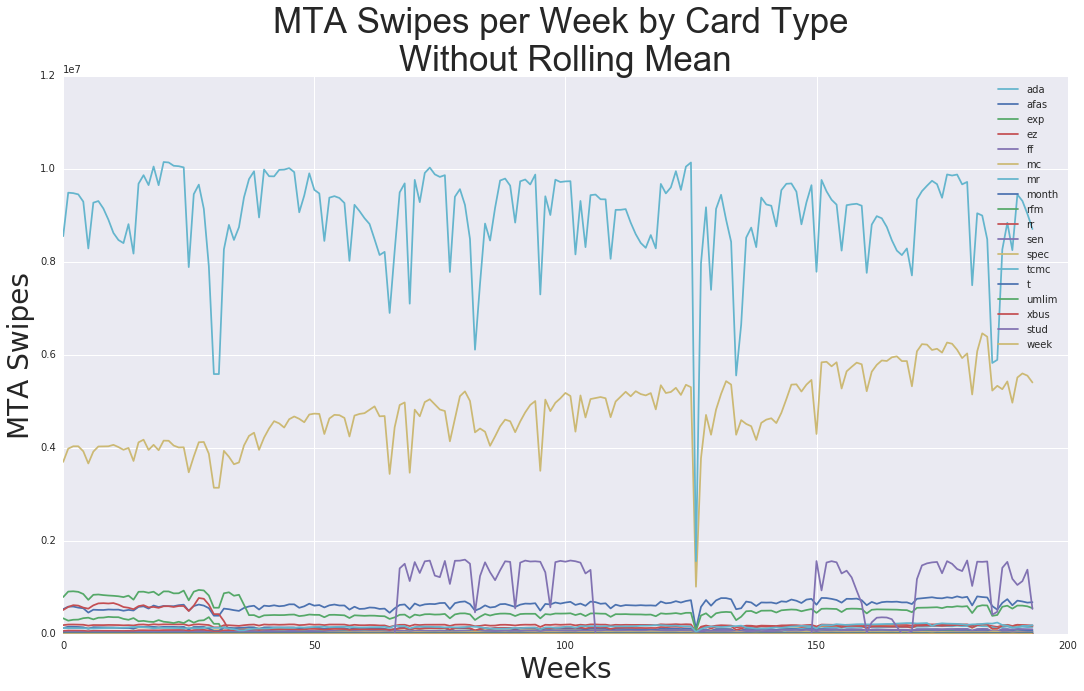

In [426]:
plt.figure(figsize=(18,10))
for x in df.columns[1:]:
    plt.plot(df[x],label=x) 
    plt.legend()
plt.xlabel('Weeks', fontsize = 28)
plt.ylabel('MTA Swipes', fontsize = 28)
plt.title('MTA Swipes per Week by Card Type \nWithout Rolling Mean', fontsize=35)

/Users/christianrosado/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()


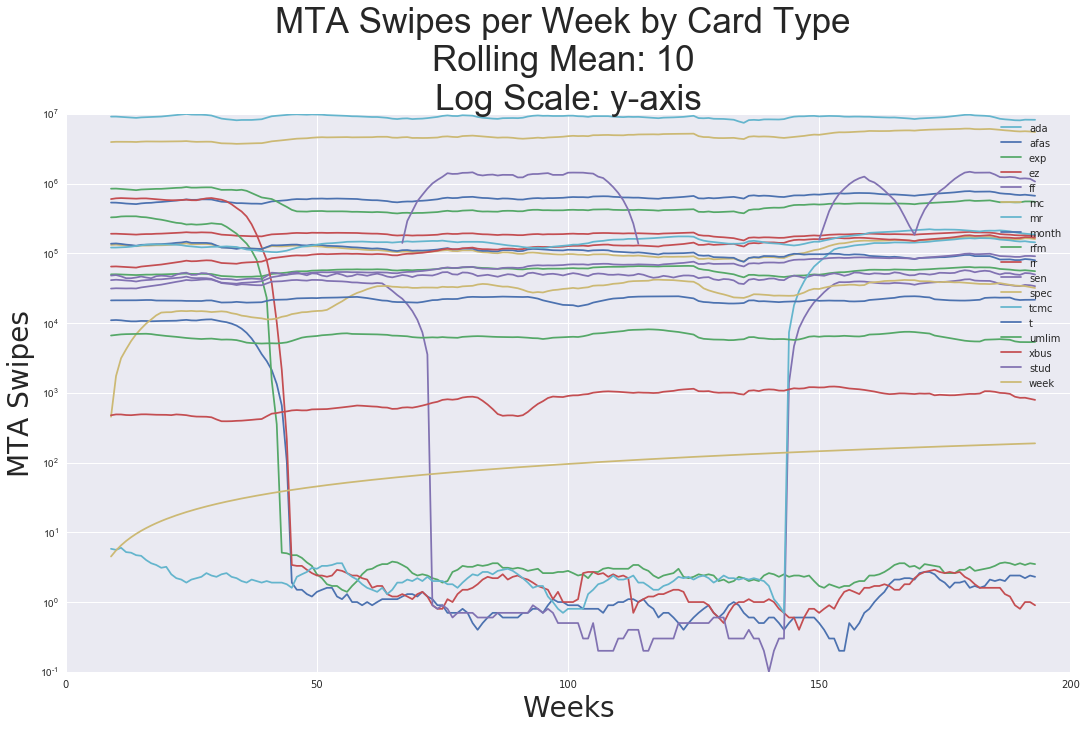

In [427]:
plt.figure(figsize=(18,10))
for x in df.columns[1:]:
    plt.semilogy(pd.rolling_mean(df[x], 10),label=x) 
    plt.legend()
plt.xlabel('Weeks', fontsize = 28)
plt.ylabel('MTA Swipes', fontsize = 28)
plt.title('MTA Swipes per Week by Card Type \nRolling Mean: 10 \nLog Scale: y-axis', fontsize=35)

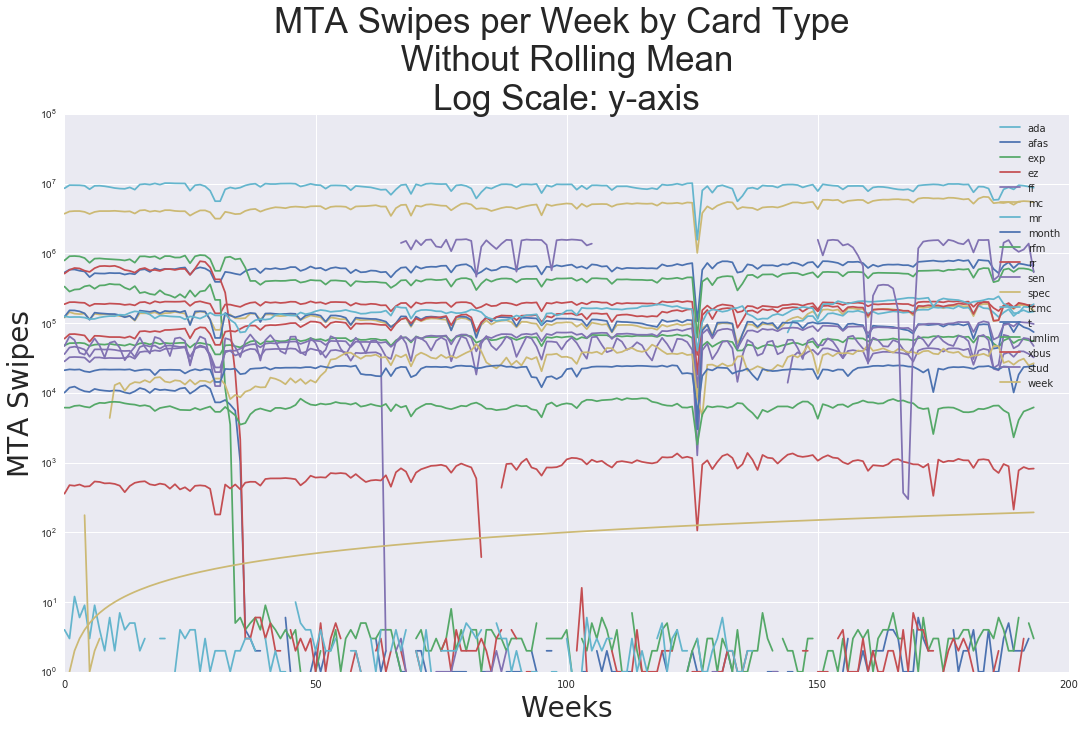

In [428]:
plt.figure(figsize=(18,10))
for x in df.columns[1:]:
    plt.semilogy(df[x],label=x) 
    plt.legend()
plt.xlabel('Weeks', fontsize = 28)
plt.ylabel('MTA Swipes', fontsize = 28)
plt.title('MTA Swipes per Week by Card Type \n Without Rolling Mean \nLog Scale: y-axis', fontsize=35)

## Let's take a look at the Card Types' individual structures and slopes... 
### Each figure has:
* ploted the ridership per week per card type, 
* a smoothed ridership by a factot of 10,
* and a predicted line of ridership by week

/Users/christianrosado/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


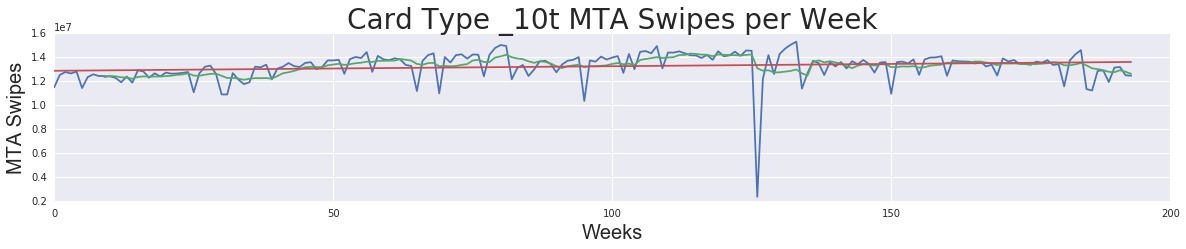

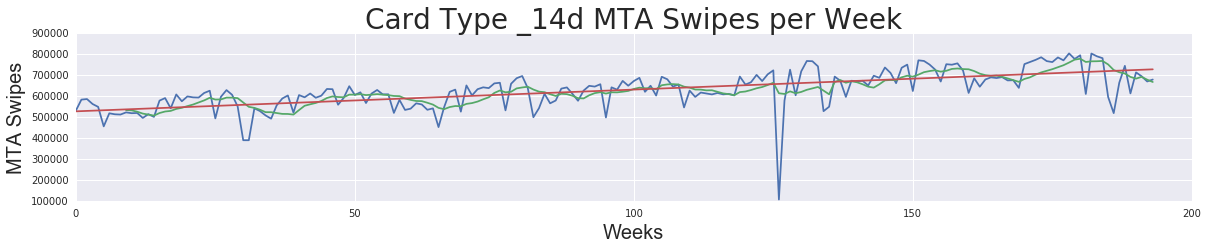

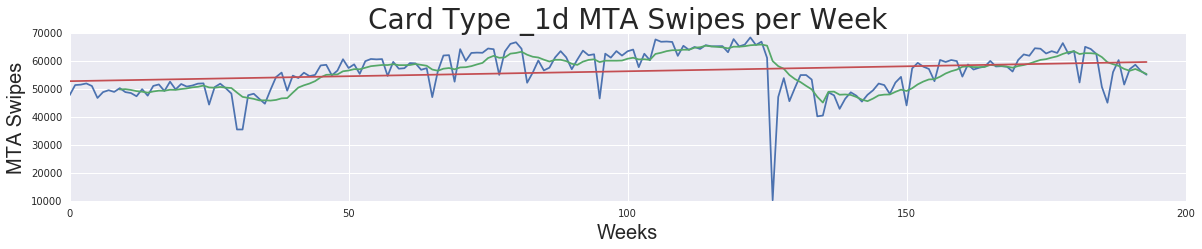

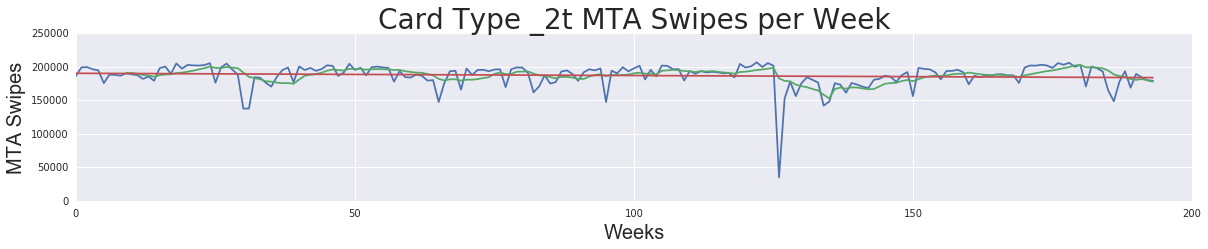

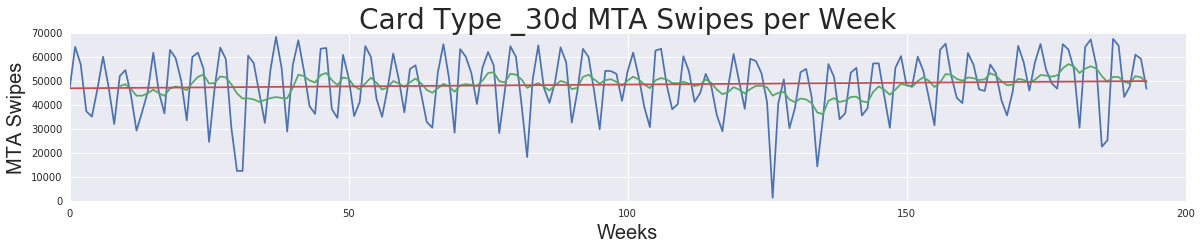

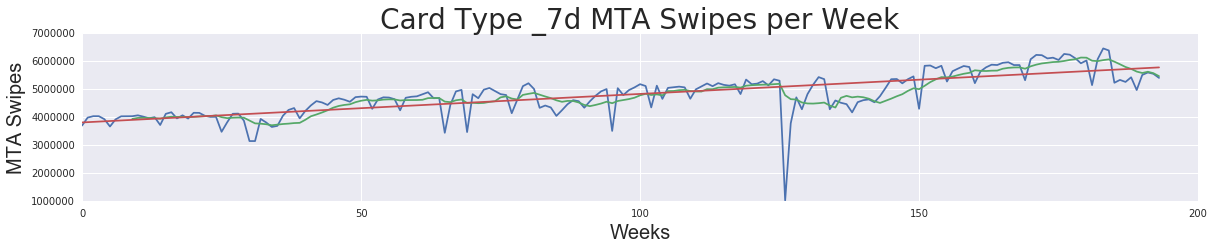

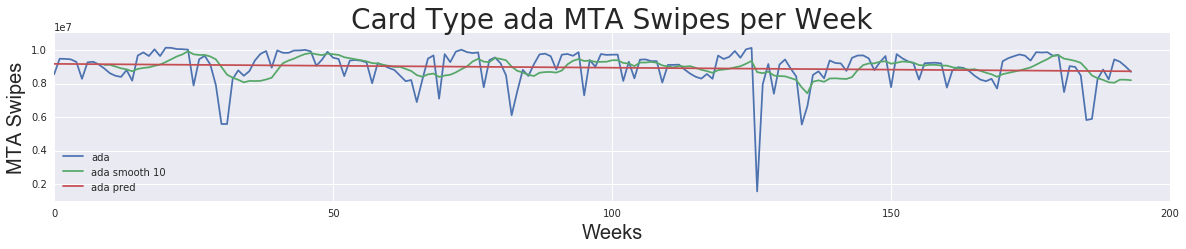

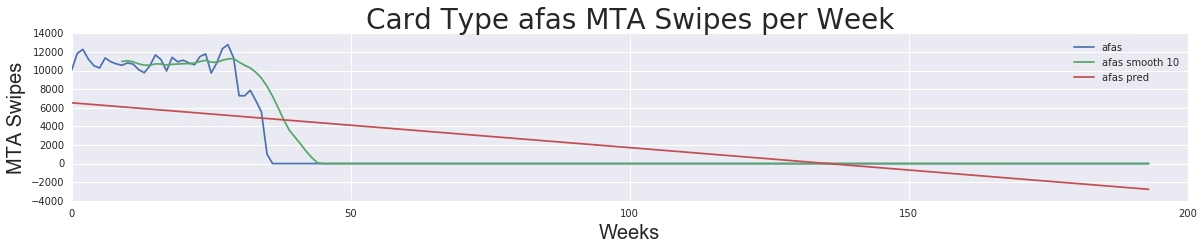

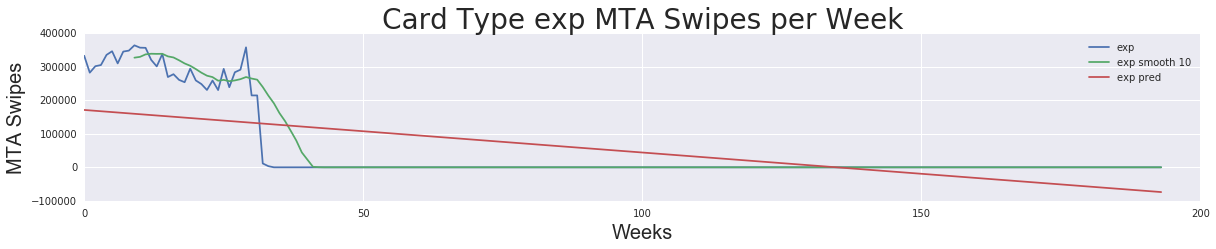

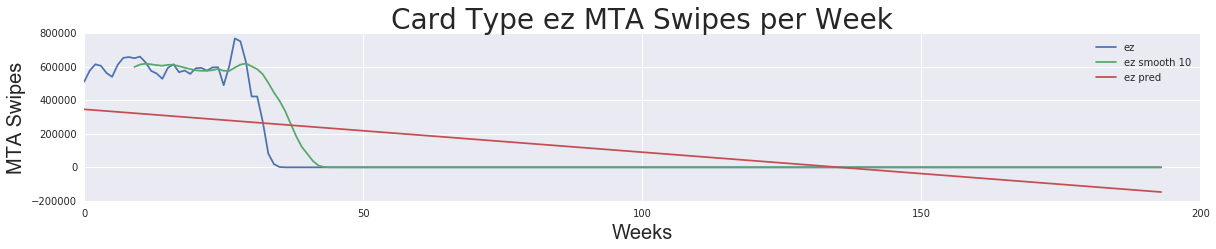

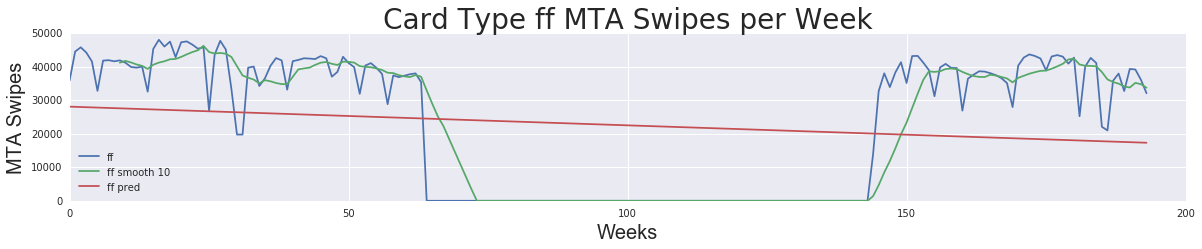

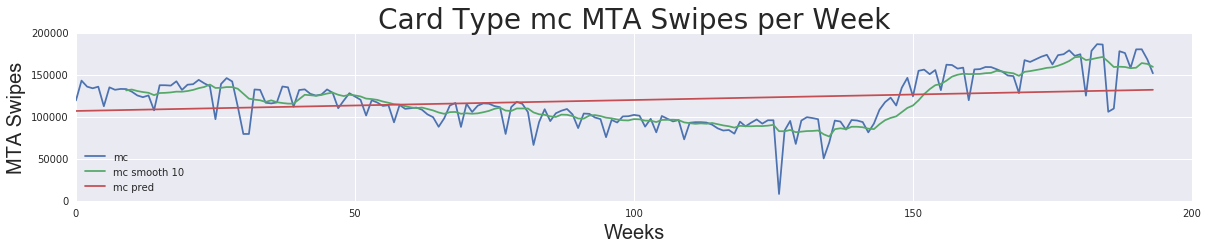

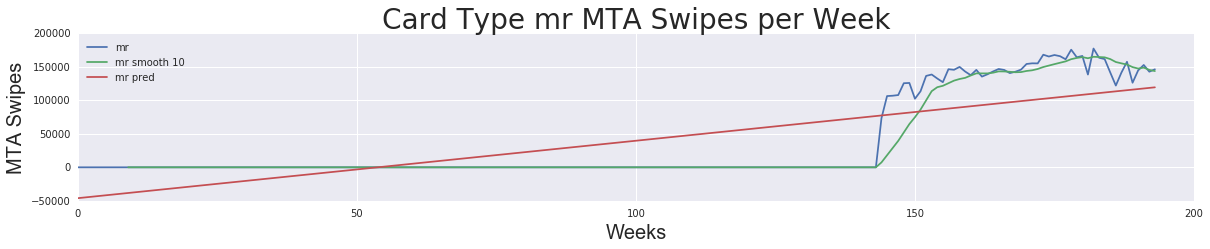

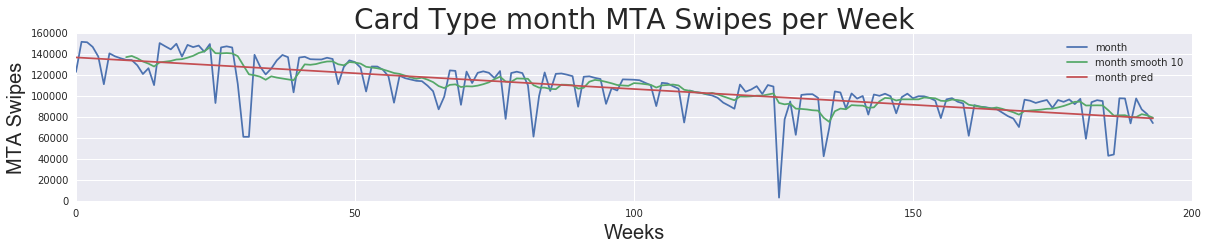

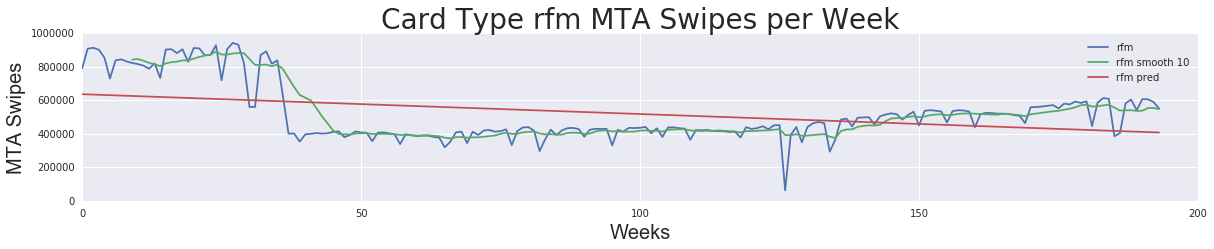

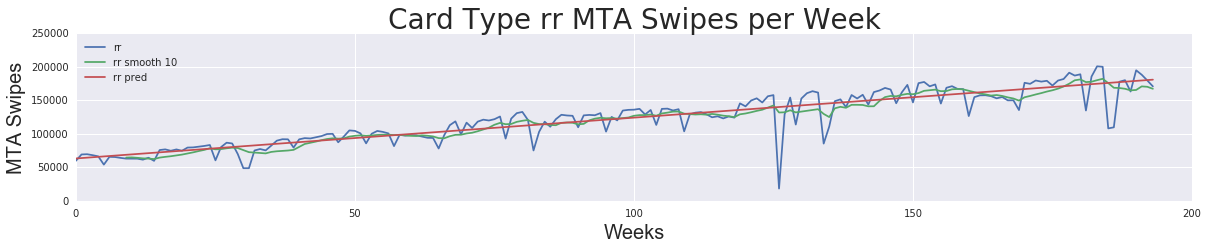

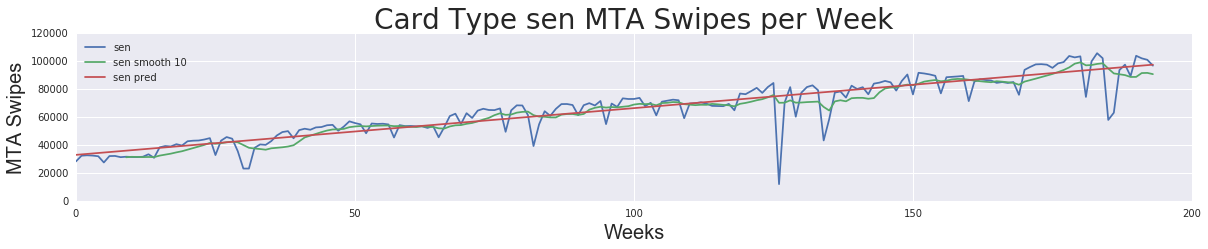

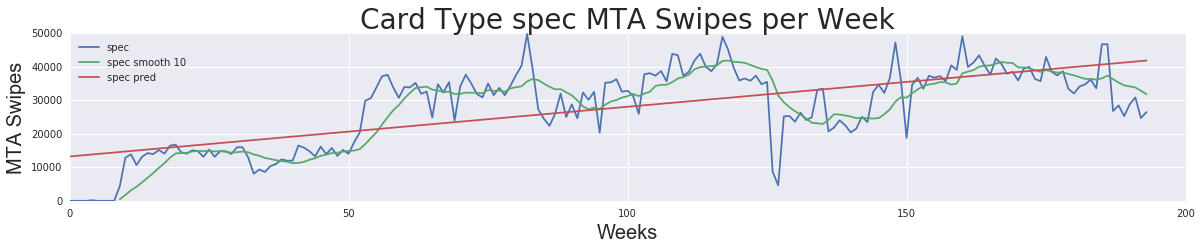

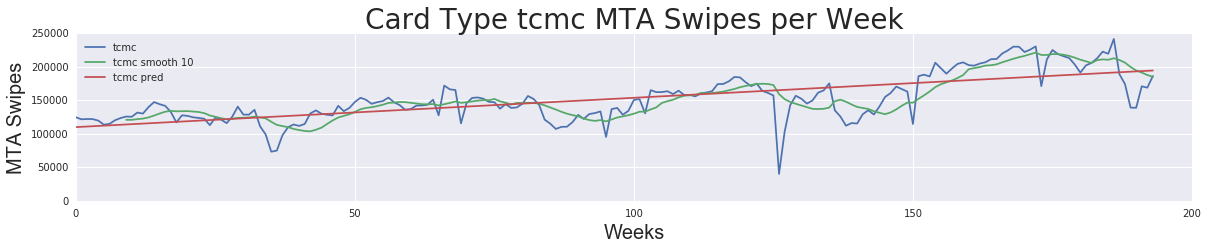

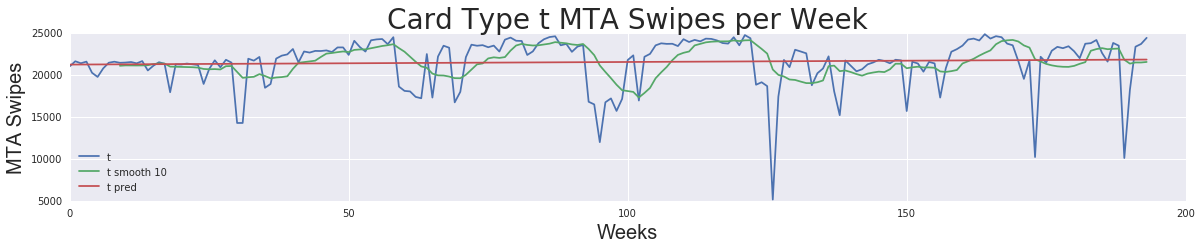

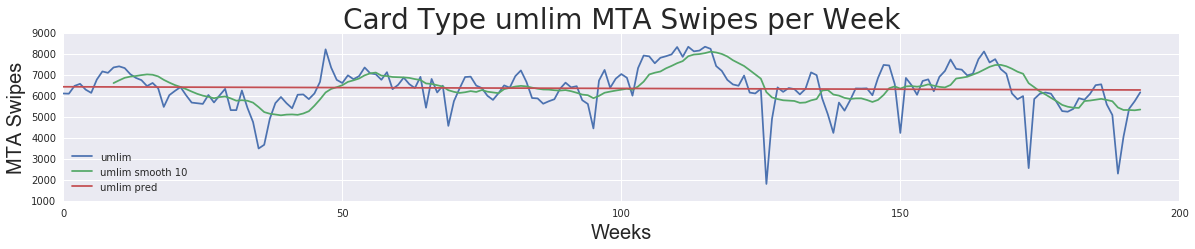

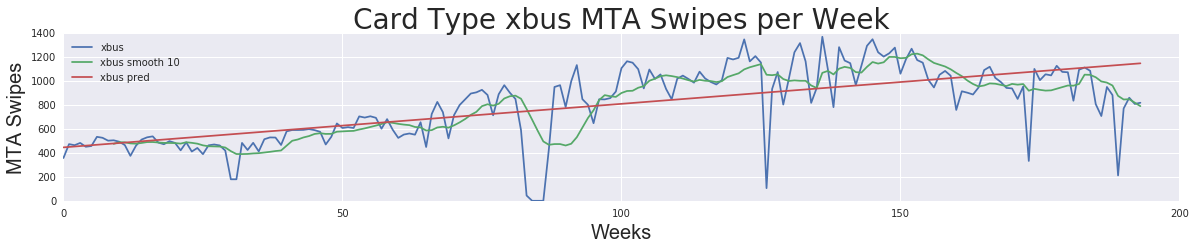

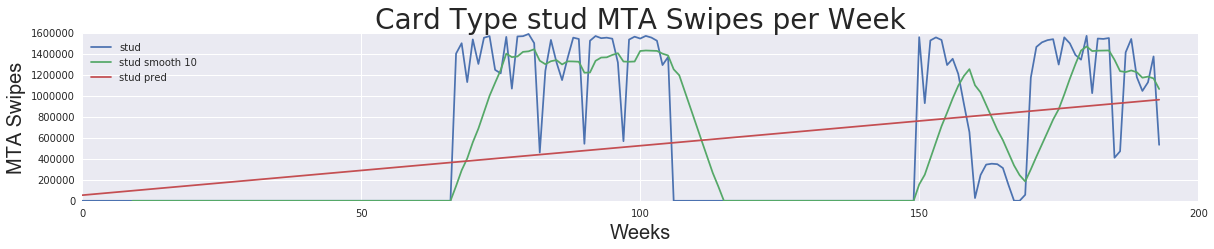

In [364]:


for x in df.columns[:-1]:
    fig = plt.figure(figsize=(20,3))
    lm = smf.ols(formula=x+ ' ~ week', data=df).fit()
    plt.plot(df[x],label=x) 
    #plt.plot(pd.rolling_mean(df['7d'], 3),label='7d smooth 3') 
    plt.plot(pd.rolling_mean(df[x], 10),label=x+' smooth 10')
    plt.plot(df.week, lm.predict(),label=x+' pred')
    plt.legend(loc=0)
    plt.title('Card Type '+ x + ' MTA Swipes per Week', fontsize=28)
    plt.xlabel('Weeks', fontsize = 20)
    plt.ylabel('MTA Swipes', fontsize = 20)
    



In [117]:
mean_first_10weeks = sum(df['7d'].loc[:10])/10
mean_last_10weeks = sum(df['7d'].loc[-10:])/10

In [118]:
print mean_first_10weeks
print mean_last_10weeks

4340670.3
93016296.2


In [146]:
swipe_increase_data = []
for card_type in range(df.shape[1]):
    mean_first_10weeks = sum(df.iloc[:10,card_type])/10
    mean_last_10weeks = sum(df.iloc[-10:,card_type])/10
    per = (mean_last_10weeks/mean_first_10weeks)*100
    swipe_increase_data.append(per)
print swipe_increase_data
    #print ridetype[card_type], 'increased by \t', per, '% \n\n'
    #senior tickets have the highest

[102.17979259493275, 125.20650527713835, 111.13451398728229, 93.380335995593498, 103.37870807111489, 138.97476036165585, 89.984134151867124, 0.020944696893810386, 0.0010687032690411625, 0.00015019557967733651, 81.880213017120383, 121.35405569957318, 2478493.1034482759, 57.872238456361572, 64.960843137605693, 259.29598859197716, 290.93967688393587, 7018.2378854625558, 153.22710626953696, 102.15890322794365, 80.906388180432515, 166.2326753464931, inf]


/Users/christianrosado/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars


In [150]:
new_df = pd.DataFrame()

In [152]:
new_df['Card Type'] = ridetype 
new_df['% Increase'] = swipe_increase_data

## As a result, we notice senior tickests have the largest increse in popularity and rmf having the least. 

In [178]:
new_df.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})
#new_df.head(23)

## Task 3 - Periodic Trend Detection

In [253]:
mta_allsum = np.nansum(mta_data, axis=1)
print (mta_allsum.shape)

(600, 194)


In [259]:
fff=[] #store value of rfft
ff3=[] # store value of ff[i][3]

(600, 194)


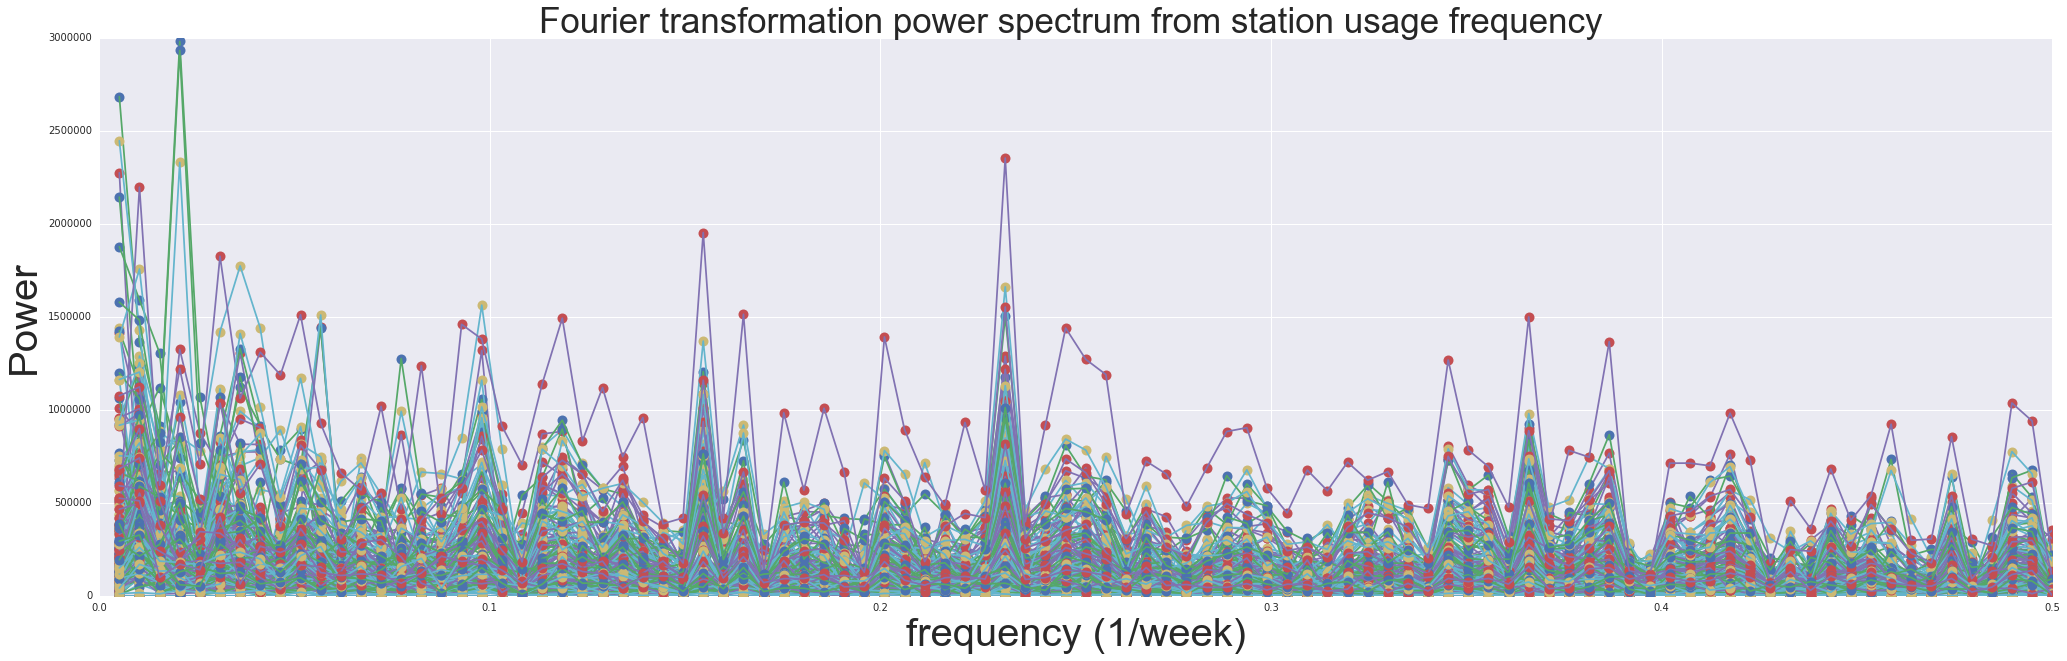

In [260]:
mta_data.shape
mta_allsum = np.nansum(mta_data, axis=1)
print (mta_allsum.shape)
mtastationdataframe = pd.DataFrame(mta_allsum)
mtastationdataframe.head()
mta_allsum.shape
len(np.abs(np.fft.rfft(mta_allsum)))
ff =((np.abs(np.fft.rfft(mta_allsum))))
N = len(mta_allsum[0])
period = 1
fig=plt.figure(figsize=(35,10))
ax=fig.add_subplot(111)

for i in range(N):
    ax.plot(np.fft.rfftfreq(N, period)[1:], (ff[i][1:]), 'o', ms=10)
    ax.plot(np.fft.rfftfreq(N, period)[1:], (ff[i][1:]), '-')
    fff.append(np.abs(np.fft.rfft(mta_allsum[i]))[1:])
    ff3.append(fff[i][3])
    
#allperiods = [1.0/194, 1.0/104, 1.0/52, 1.0/26, 1.0/13, 1.0/8, 1.0/4, 1.0/2]
#ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90, fontsize=40)
#ax.set_xticklabels('',rotation=90, fontsize=40)

#ax.set_xlim(0,1.0/40)

plt.xlabel("frequency (1/week)", fontsize=40)
plt.title('Fourier transformation power spectrum from station usage frequency ', size = 35)


plt.ylabel('Power', fontsize=40)
#plt.legend(loc = 'upper left')

In [262]:
#print fff
#print fff.shape

In [263]:
ff3_sort = ff3[:]
sorted(ff3_sort,reverse = 1)[0:4]


[2980160.6355953491,
 2931895.8769513383,
 2329896.5813884311,
 1324540.8730565044]

In [265]:
import heapq

ff3_4 = heapq.nlargest(4, ff3)
L4 = []
for i in range(0,4):
    L4.append(np.where(ff3 == ff3_4[i])[0][0])
L4

[0, 150, 32, 19]

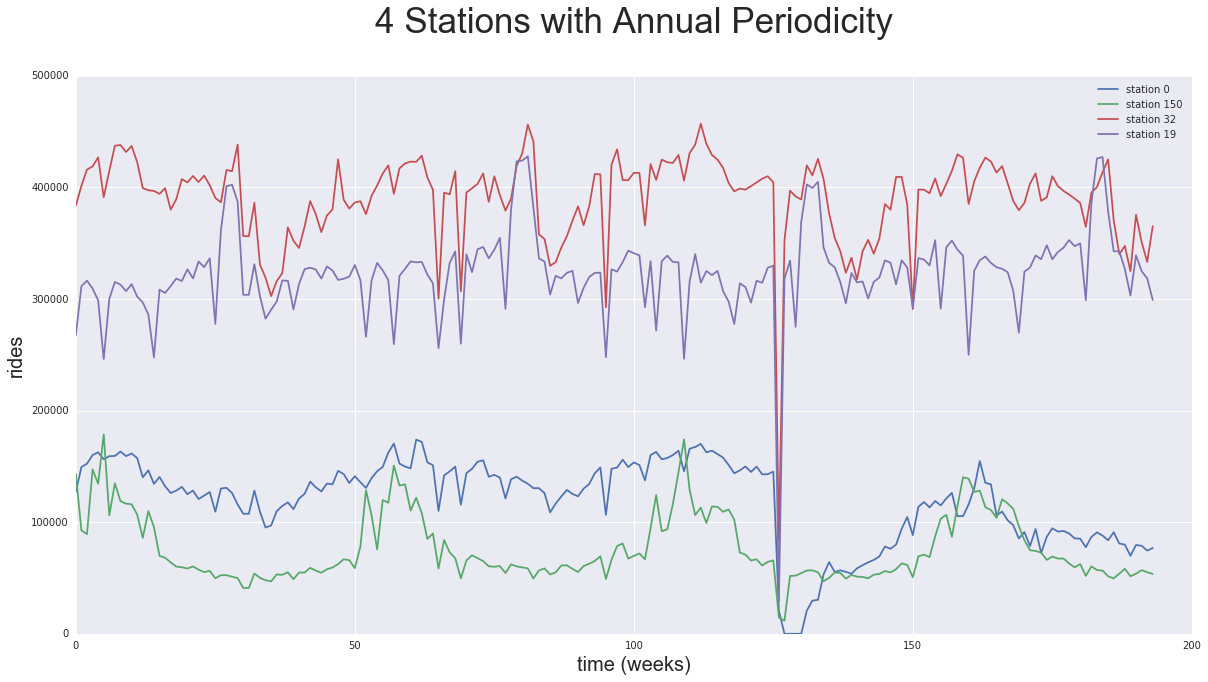

In [431]:
fig = plt.figure(figsize = (20,10))
for i in L4:
    plt.plot(mta_allsum[i], label = "station"+' '+ str(i))
plt.legend(loc=0) #bbox_to_anchor = (1.3, 0.9))
plt.xlabel("time (weeks)", fontsize = 20)
plt.ylabel("rides", fontsize = 20)
#plt.ylim(0, 250000)
plt.title("4 Stations with Annual Periodicity\n", fontsize = 35)

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)

## note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the no.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```


as opposed to just 

use the no.nansum etc
```
np.mean(mtarides)
np.sum(mtarides)
```

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

#i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

#removing empty light curves
```
tots = tots[tots.std(1)>0]
```

#with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

#and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

#then you can run:

```
km.fit(vals)
```

# HINTS: 


## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, dependingon the question) the appropriate dimension in different parts of the homework: when you need to work on the station level, collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average). The sum and average functions take an "axis" argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the dight axis.


# Possibly useful functions

I  used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
```
np.fft.rfft(mydata) 
```  

    will return the *real* part of the fourier transform (which is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math. All you need to know is that you need the real part). But what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the 
```
np.array.flatten()
np.array.reshape()
```
    array methods allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````



In [2]:
#after reading the datacube you should see:
mtaRides.shape


(600, 23, 194)

ride types list

In [6]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

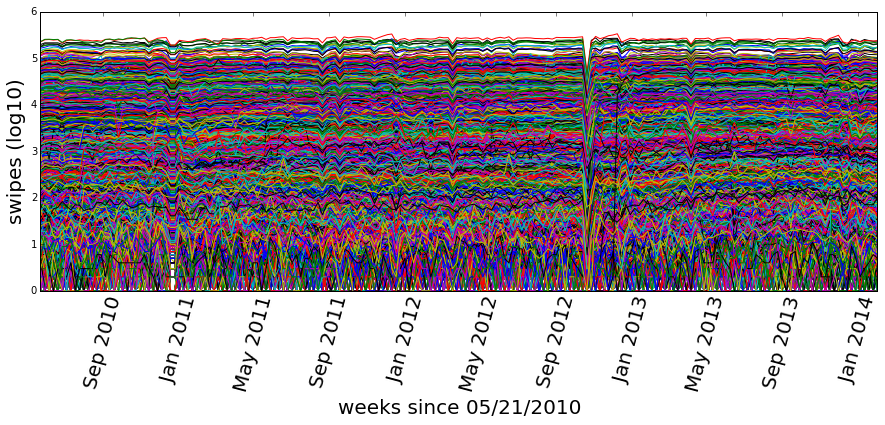

In [6]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mtaRide.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(23, 194)
(600, 194)


## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the *number of rides* near the beginning to the *number of rides* near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


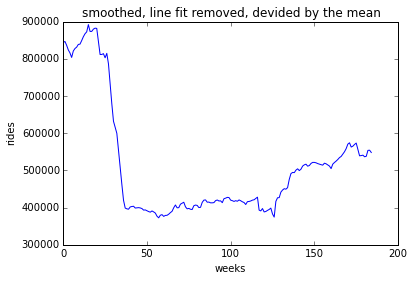

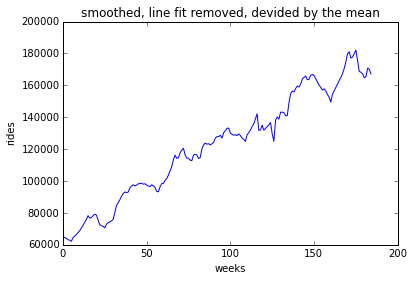

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

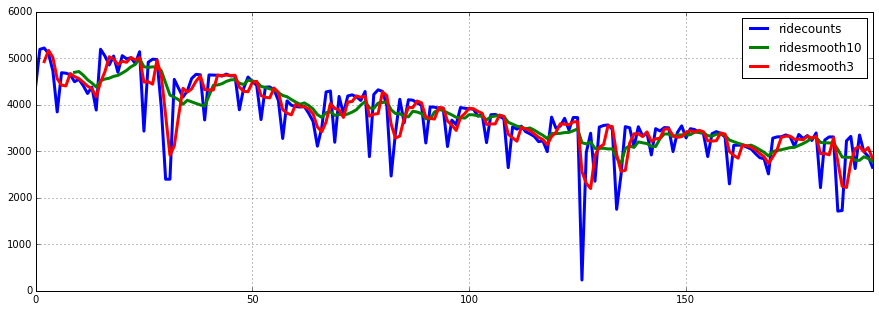

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

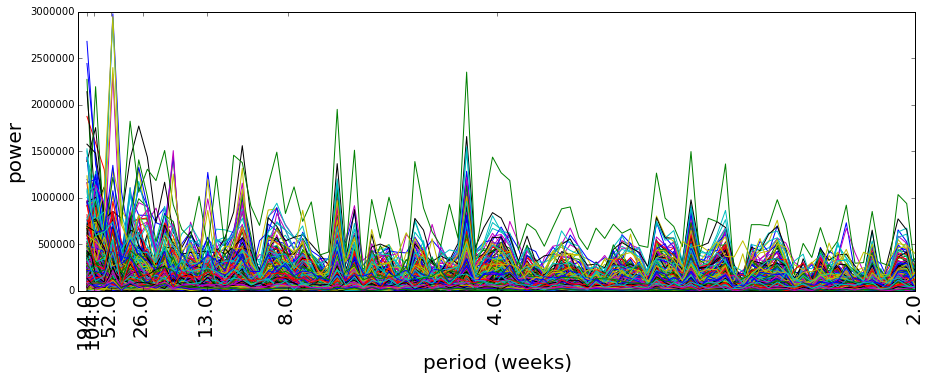

In [51]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 

...
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

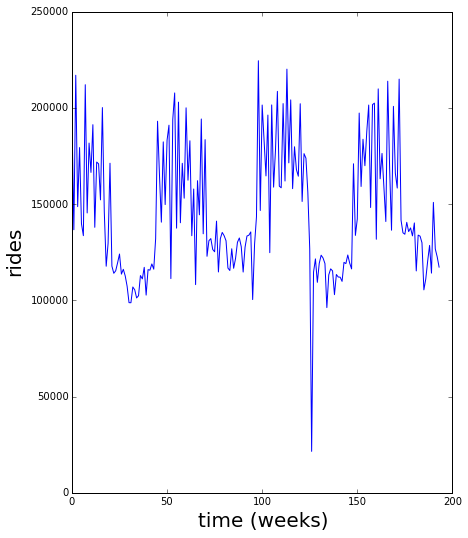

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space